In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Всё заключается в подборе параметров в конце

df = pd.read_excel(r"DataModel1.xls", header=None)
df.columns = ["X", "Y"]
df

,X,Y
0,203.425223,-2.223567
1,196.117116,4.793554
2,210.164647,5.383668
3,198.171007,-2.698326
4,219.780381,10.217722
...,...,...
995,213.626708,-16.985357
996,220.252493,2.082090
997,220.111033,-6.877226
998,200.671068,-12.520955


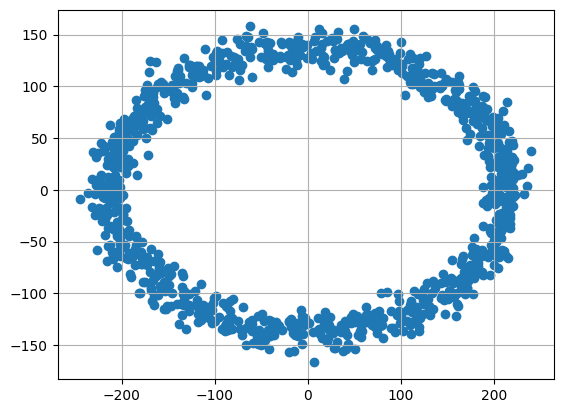

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df["X"], df["Y"])
plt.grid()
plt.show()

In [3]:
import numpy as np

def model(x, a, b): # -> y
    return np.sqrt(((a**2)*(b**2) - (a**2)*(x**2))/(a**2))
    # return np.sqrt((((a**2)*(b**2) - (a**2)*(x**2))))/(a)
# np.sqrt(((a**2)*(b**2) - (a**2)*(x**2))/(a**2)) == 

# print(model(1, 2, 3))

def og_model(x, y, a, b):
    return ((x**2/a**2) + (model(x, a, b)**2/b**2)) == 1

print(og_model(1, 1, 1, 1))

True


In [4]:
for i in df.columns:
    print(df[i].isnull().any())

False
False


In [5]:
df = df.apply(lambda x: abs(x))
df

,X,Y
0,203.425223,2.223567
1,196.117116,4.793554
2,210.164647,5.383668
3,198.171007,2.698326
4,219.780381,10.217722
...,...,...
995,213.626708,16.985357
996,220.252493,2.082090
997,220.111033,6.877226
998,200.671068,12.520955


In [6]:
from scipy.optimize import curve_fit
# from scipy.optimize import Bounds
init_guess = [210, 140]


# Будет ошбика из-за неявной функции
# params, _ = curve_fit(model, df["X"].to_numpy().tolist(), df["Y"].to_numpy().tolist(), p0=init_guess, bounds=(0, 99999999), maxfev=50000)

# params[0], params[1]

In [7]:
from scipy.optimize import minimize
import numpy as np

# ============ ОПРЕДЕЛЕНИЕ ОШИБКИ ============
def error_function(params, x, y):
    a, b = params
    # model_values = model(x, a, b)
    
    # Квадратичная ошибка
    error = sum((((x**2/a**2) + (y**2/b**2)) - 1)**2)
    
    # Или абсолютная ошибка
    # error = np.sum(np.abs(sales - model_values))
    
    return error

# ============ МИНИМИЗАЦИЯ ============
# init_guess = [90, 300]
init_guess = [df["X"].max(), df["Y"].max()]

result = minimize(
    error_function, 
    x0=init_guess, 
    args=(df["X"].to_numpy(), df["Y"].to_numpy()),
    method='BFGS',  # Метод градиентного спуска,
)

"""
**Методы оптимизации в minimize:**

| Метод | Когда использовать |
|-------|-------------------|
| `'BFGS'` | Универсальный, хорош для гладких функций |
| `'Nelder-Mead'` | Не требует градиентов, медленнее |
| `'Powell'` | Хорош для функций с шумом |
| `'L-BFGS-B'` | Если нужны ограничения на параметры |
"""

a1, b1 = result.x
print(f"Найденные параметры: {result.x}")
print(f"Минимальная ошибка: {result.fun}")

Найденные параметры: [215.29603648 139.46112579]
Минимальная ошибка: 15.623774738073516


In [8]:
from sklearn.linear_model import LinearRegression
# import numpy as np
# import pandas as pd

# ============ ЗАГРУЗКА ДАННЫХ ============
# df = pd.read_csv('forecast1.csv')

# # ============ ОБРАБОТКА ПРОПУСКОВ ============
# df = df.dropna()  # Удалить строки с пропусками

# # ============ ФОРМИРОВАНИЕ ПРИЗНАКОВ ============
# t = df['week'].values
# sales = df['sales'].values

x = df["X"].to_numpy()
y = df["Y"].to_numpy()

# Создать матрицу признаков [t, t², sin(...)]
X = np.column_stack([
    x**2,
    # df["X"].to_numpy()**2,
    # np.sqrt(df["X"].to_numpy())
])

# ============ ОБУЧЕНИЕ МОДЕЛИ ============
model = LinearRegression()
model.fit(X, y)

# Параметры
# a2, a3, a4 = model.coef_
a2 = model.coef_
a1 = model.intercept_


print(a1, a2)
# print(f"Параметры: a1={a1:.2f}, a2={a2:.2f}, a3={a3:.4f}, a4={a4:.2f}")

# ============ ПРОГНОЗИРОВАНИЕ ============
# future_weeks = np.arange(104, 116)
# X_future = np.column_stack([
#     future_weeks,
#     future_weeks**2,
#     np.sin(2*np.pi*(1/13)*future_weeks)
# ])

# predictions = model.predict(X_future)

# # ============ ВЫВОД ============
# answer = [f"{pred:.2f}" for pred in predictions]
# print(", ".join(answer))


# true = np.array([653.07, 675.12, 694.82, 710.26, 720.55, 726.0, 728.04, 728.92, 731.16, 737.01, 747.9, 764.13])
# pred = np.array([float(f"{pred:.2f}") for pred in predictions])

# diff = true - pred
# norm = np.linalg.norm(diff)
# score = round(max(20 - norm / 6, 0))

# norm, score

143.1788982703799 [-0.00242832]


In [ ]:
import numpy as np

# Диапазон параметров
a_values = np.linspace(0, 300, 100)
b_values = np.linspace(0, 300, 100)

best_error = float('inf')
best_a = None
best_b = None
from tqdm import tqdm
for a in tqdm(a_values):
    for b in b_values:
        error = sum((((x_i**2/a**2) + (y_i**2/b**2)) - 1)**2 for x_i, y_i in zip(x, y))
        if error < best_error:
            best_error = error
            best_a = a
            best_b = b

print(f"Лучший параметр: {best_a} {best_b} {best_error}")

100%|██████████| 100/100 [00:04<00:00, 20.84it/s]

Лучший параметр: 215.15151515151516 139.3939393939394 15.625108441890161
